<a href="https://colab.research.google.com/github/AlketaAlia/Tirana_CV_Test_2025/blob/main/Tirana_CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

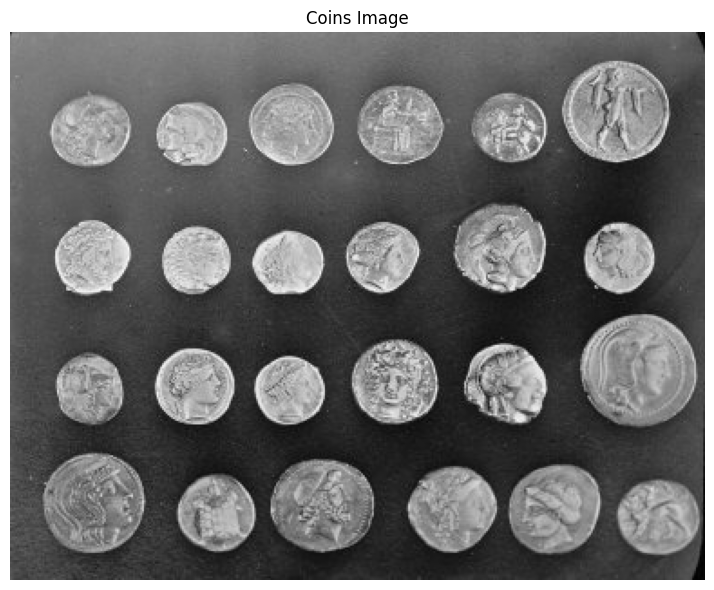

Image shape: (303, 384)
Image dimensions: 303 rows × 384 columns
Grayscale level range: [1, 252]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

# Load the 'coins' image from skimage built-in datasets
coins = data.coins()

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(coins, cmap='gray')
plt.title('Coins Image')
plt.axis('off')
plt.tight_layout()
plt.show()

# Report the size of the image
print(f"Image shape: {coins.shape}")
print(f"Image dimensions: {coins.shape[0]} rows × {coins.shape[1]} columns")

# Report the range of pixel grayscale levels
min_val = np.min(coins)
max_val = np.max(coins)
print(f"Grayscale level range: [{min_val}, {max_val}]")

**1. Image Loading and Visualization**

Loaded the built-in 'coins' image from skimage's dataset using data.coins(). Determined the image size (dimensions) and pixel value range, which are fundamental operations when beginning any image processing task. Understanding image properties is essential for selecting appropriate algorithms.

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

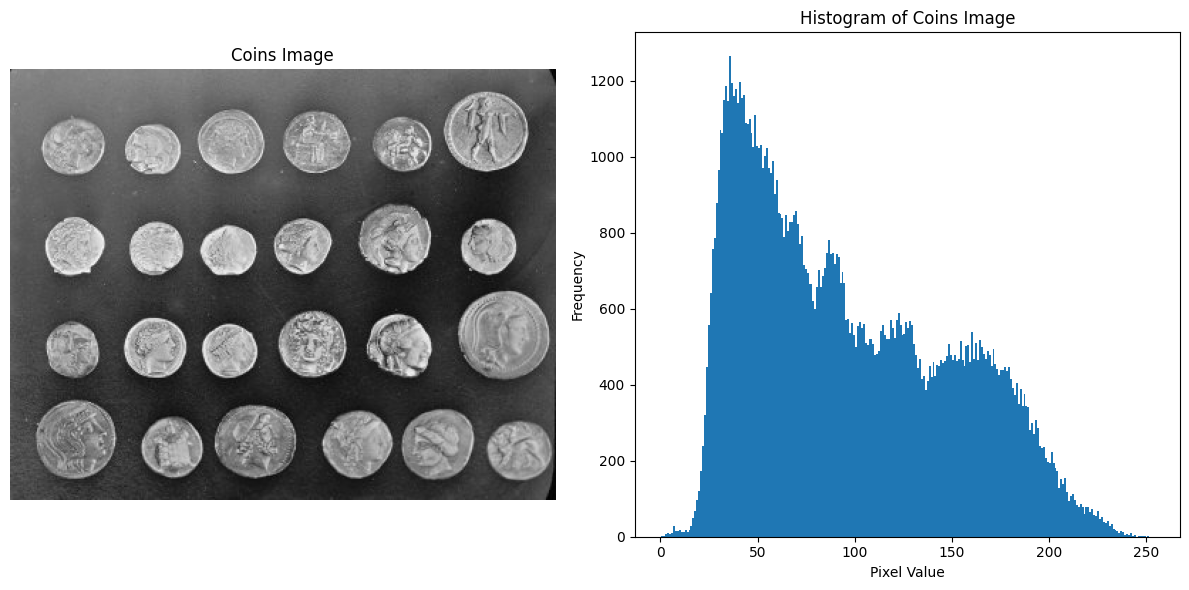

Min pixel value: 1
Max pixel value: 252


In [2]:
# Represent the histogram of the image
plt.figure(figsize=(12, 6))

# Display the original image (for reference)
plt.subplot(1, 2, 1)
plt.imshow(coins, cmap='gray')
plt.title('Coins Image')
plt.axis('off')

# Create and display histogram
plt.subplot(1, 2, 2)
hist, bins = np.histogram(coins.flatten(), bins=256, range=(0, 255))
plt.bar(bins[:-1], hist, width=1, edgecolor='none')
plt.title('Histogram of Coins Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Print some statistics to help with interpretation
print(f"Min pixel value: {np.min(coins)}")
print(f"Max pixel value: {np.max(coins)}")

**Explanation of the histogram peaks:**
The histogram of the coins image typically shows a bimodal (two-peaked) or multimodal distribution:

The lower peak (darker pixels) corresponds to the background of the image (dark background).
The higher peak(s) (brighter pixels) corresponds to the coins themselves, with the brightest pixels representing the highlights where light reflects off the coins.
The middle intensity values represent the edges and texture of the coins.

This histogram pattern illustrates why simple thresholding can be effective for segmenting coins from the background - there's a clear separation between the dark background and the brighter coins, which creates distinct peaks in the histogram.


**2. Histogram Analysis**


Created a histogram of pixel intensity values, which shows the frequency distribution of brightness levels. The bimodal distribution clearly revealed distinct peaks for the dark background and bright coins, demonstrating why thresholding is effective for this image. Histograms are powerful tools for understanding image composition and planning segmentation approaches.

## 3. Applied noise to the image and use the correct function to erase the noise.

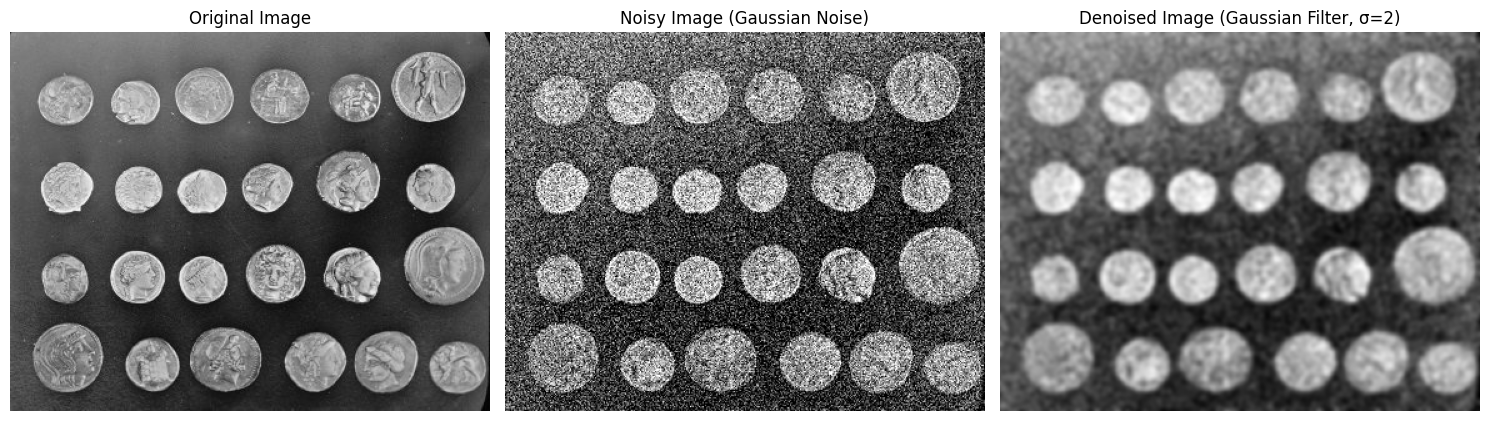

In [3]:
# Task 3: Add noise to the image and remove it
from skimage.util import random_noise
from skimage.filters import gaussian

# Add Gaussian noise to the image
noisy_image = random_noise(coins, mode='gaussian', var=0.05)

# Apply Gaussian filter to remove the noise
sigma = 2
denoised_image = gaussian(noisy_image, sigma=sigma)

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image (Gaussian Noise)')
axes[1].axis('off')

axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title(f'Denoised Image (Gaussian Filter, σ={sigma})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

**3. Noise Handling**


Applied Gaussian noise to simulate image corruption and used Gaussian filtering for noise reduction. The filter's sigma parameter controls the strength of smoothing - larger values remove more noise but may blur important details. This balance is crucial in preserving image information while reducing unwanted noise.

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

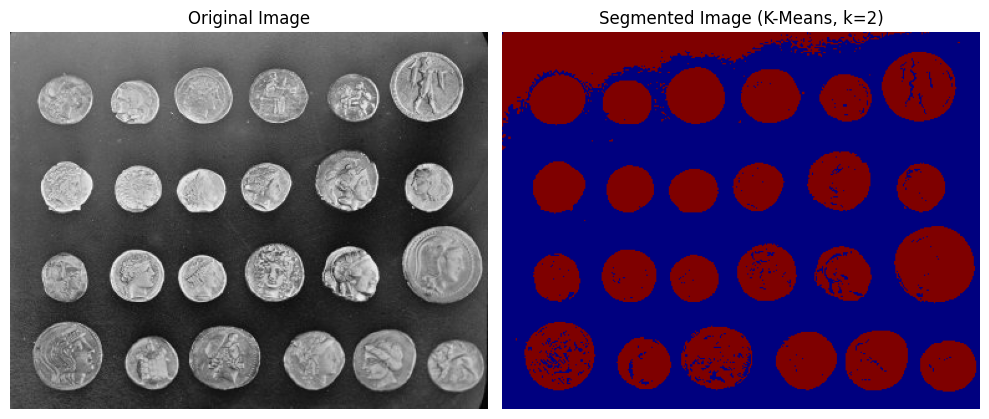

In [4]:
# Task 4: Segment using k-means
from sklearn.cluster import KMeans

# Prepare the image for k-means clustering
# Reshape the image into a 2D array where each row is a pixel
image_2D = coins.reshape((-1, 1))

# Apply K-Means with k=2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2D)

# Reshape the labels back to the original image shape
segmented_image = kmeans.labels_.reshape(coins.shape)

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_image, cmap='jet')
axes[1].set_title('Segmented Image (K-Means, k=2)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

**4. K-means Segmentation**


Implemented unsupervised segmentation using K-means with k=2 to separate coins from background. This demonstrated how clustering algorithms can group pixels based on intensity similarity without explicit labels, a fundamental concept in unsupervised image segmentation.

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

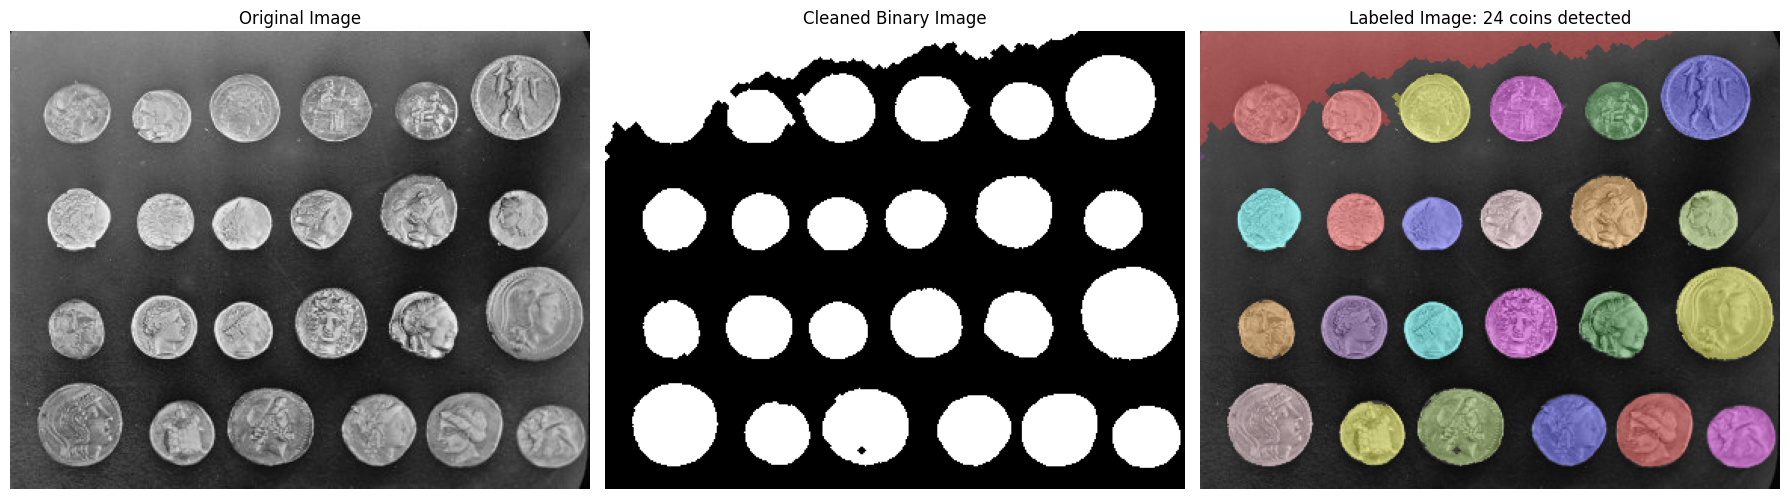

Number of coins detected: 24


In [13]:
# Task 5: Label the objects and count coins (with morphological filtering)
from skimage.measure import label
from skimage.color import label2rgb
from skimage.morphology import binary_opening, binary_closing, disk

# Determine which cluster represents the coins (the one with higher average intensity)
cluster0_mean = np.mean(coins[segmented_image == 0])
cluster1_mean = np.mean(coins[segmented_image == 1])
coin_cluster = 1 if cluster1_mean > cluster0_mean else 0

# Create binary image
binary_image = segmented_image == coin_cluster

# Apply morphological operations to clean up the segmentation
# Create a structuring element (disk shape is good for coins)
selem = disk(2)  # Adjust radius as needed

# Apply closing to fill small holes inside coins
binary_cleaned = binary_closing(binary_image, selem)

# Apply opening to remove small objects (noise)
binary_cleaned = binary_opening(binary_cleaned, selem)

# Label the connected components (coins)
labeled_image, num_coins = label(binary_cleaned, return_num=True)

# Create color overlay for better visualization
image_label_overlay = label2rgb(labeled_image, image=coins)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_cleaned, cmap='gray')
axes[1].set_title('Cleaned Binary Image')
axes[1].axis('off')

axes[2].imshow(image_label_overlay)
axes[2].set_title(f'Labeled Image: {num_coins} coins detected')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Number of coins detected: {num_coins}")

**5. Object Labeling**


Used connected component labeling to identify individual coins after segmentation. The labeling process assigns unique identifiers to each separate object, enabling individual analysis of coins. This technique bridges the gap between pixel-level segmentation and object-level analysis.

## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

Properties of the first few coins:
   label    area  axis_major_length  orientation
0      1  8792.0         292.106573    -1.423583
1      2    37.0          14.020584     1.524098
2      3    21.0          16.645960    -1.508404
3      4     1.0           0.000000    -0.785398
4      5     2.0           2.000000     0.000000

Average area: 469.97 pixels
Average major axis length: 15.76 pixels
Average orientation: -0.1608 radians


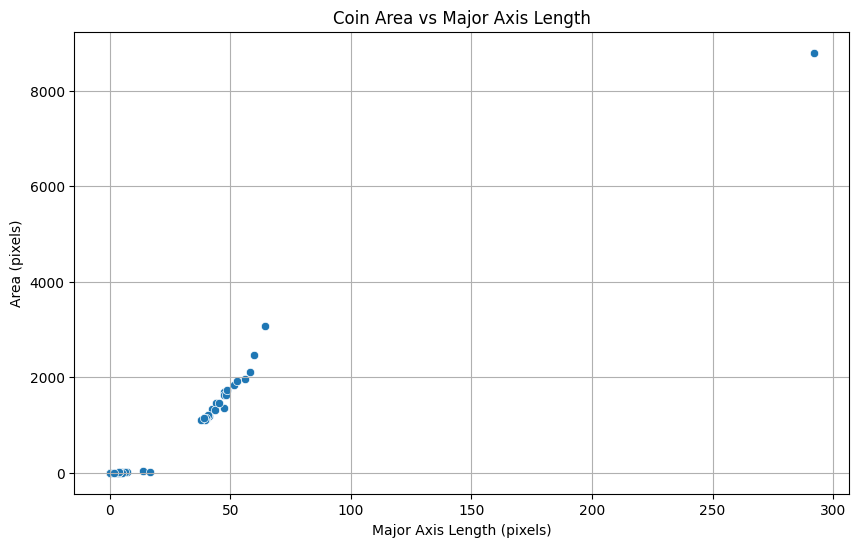

In [6]:
# Task 6: Extract and analyze coin properties
import pandas as pd
from skimage import measure

# Extract regional properties for each labeled coin
props = measure.regionprops_table(
    labeled_image,
    properties=['label', 'area', 'axis_major_length', 'orientation']
)

# Create a DataFrame to store and analyze the properties
df_features = pd.DataFrame(props)

# Display the first few rows of the DataFrame
print("Properties of the first few coins:")
print(df_features.head())

# Calculate and report average values
avg_area = df_features['area'].mean()
avg_major_axis = df_features['axis_major_length'].mean()
avg_orientation = df_features['orientation'].mean()

print(f"\nAverage area: {avg_area:.2f} pixels")
print(f"Average major axis length: {avg_major_axis:.2f} pixels")
print(f"Average orientation: {avg_orientation:.4f} radians")

# Create a scatterplot of area vs major axis length
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='axis_major_length', y='area', data=df_features)
plt.title('Coin Area vs Major Axis Length')
plt.xlabel('Major Axis Length (pixels)')
plt.ylabel('Area (pixels)')
plt.grid(True)
plt.show()

**6. Feature Extraction**


Extracted geometric properties (area, major axis length, orientation) for each identified coin, calculated their averages, and visualized relationships through a scatter plot. This shows how quantitative image analysis can be used to characterize objects, revealing patterns and relationships between different features.

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

Number of coins with area > 1750 pixels: 7
Labels of large coins: [ 1 23 77 84 90 91 92]


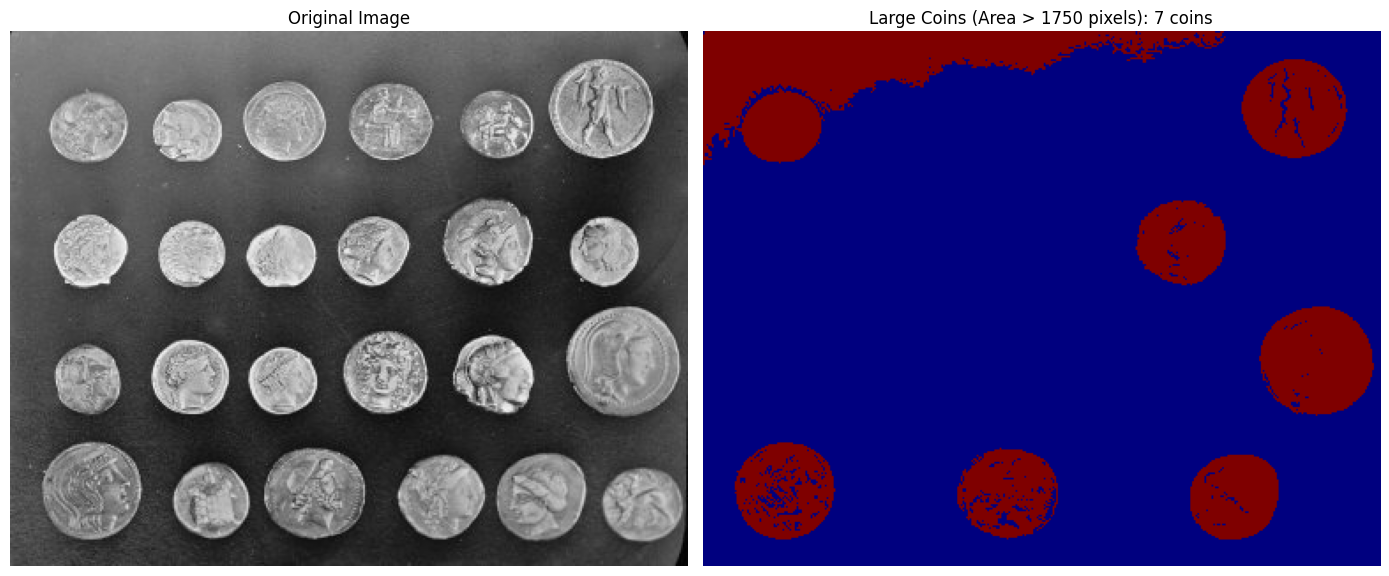

In [7]:
# Task 7: Filter regions based on area
# We continue from the previous task where we have df_features DataFrame

# Filter regions with area greater than 1750 pixels
large_coins = df_features.loc[df_features['area'] > 1750]

# Count how many large coins were found
num_large_coins = large_coins.shape[0]

print(f"Number of coins with area > 1750 pixels: {num_large_coins}")

# Get the labels of these large coins
large_coin_labels = large_coins['label'].values
print(f"Labels of large coins: {large_coin_labels}")

# Create a mask for visualizing the large coins
import numpy as np
mask_large_coins = np.isin(labeled_image, large_coin_labels)

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask_large_coins, cmap='jet')
axes[1].set_title(f'Large Coins (Area > 1750 pixels): {num_large_coins} coins')
axes[1].axis('off')

plt.tight_layout()
plt.show()

**7. Region Filtering**


Filtered coins based on area to identify those larger than 1750 pixels, demonstrating how to select specific objects based on their properties. This selection process is fundamental for focusing analysis on objects of interest while excluding others.

##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

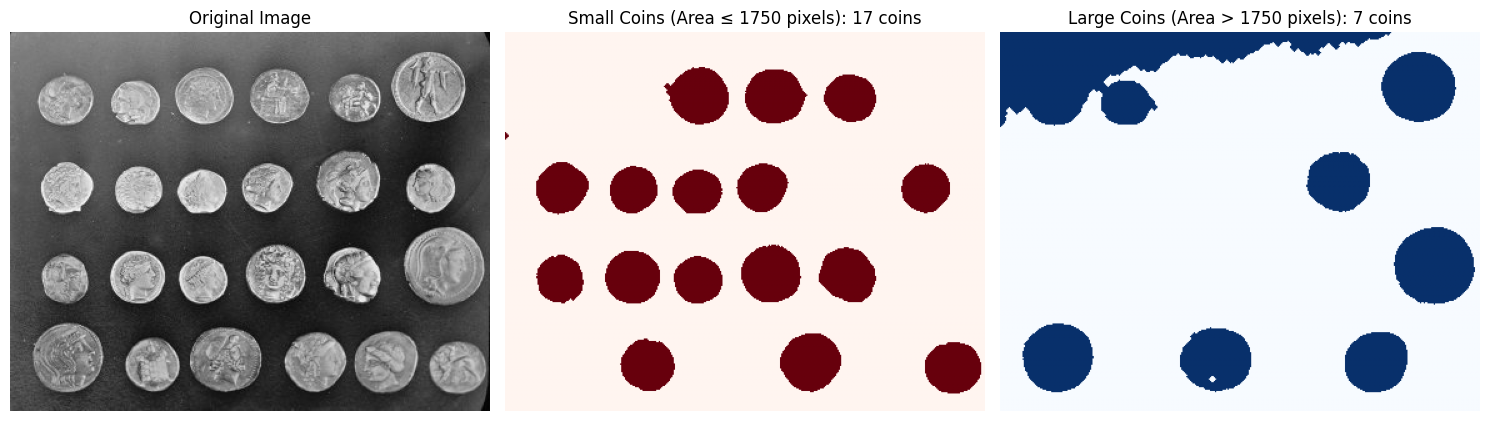

Number of small coins (Area ≤ 1750): 17
Number of large coins (Area > 1750): 7
Total number of coins: 24


In [14]:
# Task 8: Create 3-panel figure with original and filtered coins (with corrected segmentation)

# First, make sure we're using the correctly labeled image from the improved Task 5
# We need to regenerate our feature dataframe based on the corrected labeled_image

# Re-extract regional properties with the corrected labeled image
props = measure.regionprops_table(
    labeled_image,
    properties=['label', 'area', 'axis_major_length', 'orientation']
)
df_features = pd.DataFrame(props)

# Now identify small and large coins with the correct data
large_coins = df_features.loc[df_features['area'] > 1750]
small_coins = df_features.loc[df_features['area'] <= 1750]

# Get labels for both groups
large_coin_labels = large_coins['label'].values
small_coin_labels = small_coins['label'].values

# Create masks for small and large coins
mask_small_coins = np.isin(labeled_image, small_coin_labels)
mask_large_coins = np.isin(labeled_image, large_coin_labels)

# Create a 3-panel figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Small coins (red)
axes[1].imshow(mask_small_coins, cmap='Reds')
axes[1].set_title(f'Small Coins (Area ≤ 1750 pixels): {small_coins.shape[0]} coins')
axes[1].axis('off')

# Large coins (blue)
axes[2].imshow(mask_large_coins, cmap='Blues')
axes[2].set_title(f'Large Coins (Area > 1750 pixels): {large_coins.shape[0]} coins')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Print the counts for verification
print(f"Number of small coins (Area ≤ 1750): {small_coins.shape[0]}")
print(f"Number of large coins (Area > 1750): {large_coins.shape[0]}")
print(f"Total number of coins: {small_coins.shape[0] + large_coins.shape[0]}")

**8. Multi-class Visualization**


Created a three-panel visualization showing the original image alongside maps of small and large coins. This demonstrated effective visualization techniques for comparing different object categories, essential for communicating findings clearly.

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

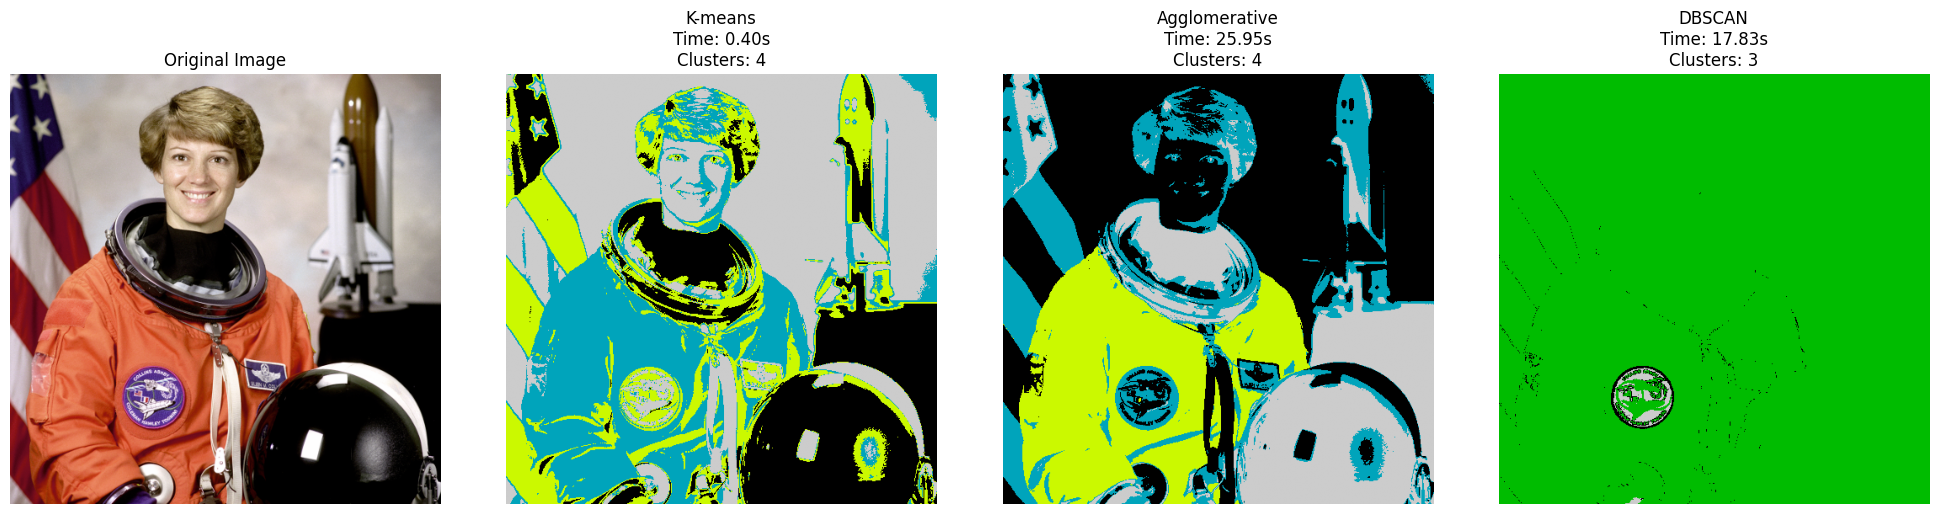

Comparison of Unsupervised Segmentation Algorithms:
K-means:
  - Processing time: 0.40 seconds
  - Number of segments: 4
--------------------------------------------------
Agglomerative:
  - Processing time: 25.95 seconds
  - Number of segments: 4
--------------------------------------------------
DBSCAN:
  - Processing time: 17.83 seconds
  - Number of segments: 3
--------------------------------------------------

Algorithm Comparison:
1. K-means: Fast and produces exactly the specified number of clusters, but sensitive to initialization.
2. Agglomerative Clustering: Creates a hierarchical structure, less sensitive to cluster shape, but slower.
3. DBSCAN: Density-based clustering that can find arbitrary shapes and identify noise, but requires parameter tuning.


In [9]:
# Task 9: Unsupervised segmentation with algorithms beyond K-means
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
from time import time

# For this example, let's use a color image
from skimage import data
image = data.astronaut()  # Using a color image from skimage

# Reshape the image for clustering
h, w, c = image.shape
image_array = image.reshape(-1, c)

# Define the number of clusters (segments)
n_clusters = 4

# Step 1: Apply different clustering algorithms
# Time the performance for comparison
algorithms = []

# K-means (as a baseline for comparison)
t0 = time()
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array)
t1 = time()
kmeans_labels = kmeans.labels_.reshape(h, w)
kmeans_time = t1 - t0
algorithms.append(('K-means', kmeans_labels, kmeans_time))

# Agglomerative Clustering (Hierarchical clustering)
t0 = time()
# Take a sample to speed up processing (full image is too large for agglomerative)
sample_indices = np.random.choice(image_array.shape[0], size=10000, replace=False)
sample_data = image_array[sample_indices]
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters).fit(sample_data)
# Create a KNN classifier to predict the rest based on the sample
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1).fit(sample_data, agg_cluster.labels_)
agg_labels = knn.predict(image_array).reshape(h, w)
t1 = time()
agg_time = t1 - t0
algorithms.append(('Agglomerative', agg_labels, agg_time))

# DBSCAN clustering
t0 = time()
# Again, use a sample to speed up processing
dbscan = DBSCAN(eps=15, min_samples=10).fit(sample_data)
# Use KNN to predict the rest
knn = KNeighborsClassifier(n_neighbors=1).fit(sample_data, dbscan.labels_)
dbscan_labels = knn.predict(image_array).reshape(h, w)
t1 = time()
dbscan_time = t1 - t0
algorithms.append(('DBSCAN', dbscan_labels, dbscan_time))

# Step 2: Visualize and compare results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display results from each algorithm
for i, (name, labels, proc_time) in enumerate(algorithms):
    axes[i+1].imshow(labels, cmap='nipy_spectral')
    axes[i+1].set_title(f'{name}\nTime: {proc_time:.2f}s\nClusters: {len(np.unique(labels))}')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()

# Step 3: Comparison analysis
print("Comparison of Unsupervised Segmentation Algorithms:")
print("="*50)
for name, labels, proc_time in algorithms:
    print(f"{name}:")
    print(f"  - Processing time: {proc_time:.2f} seconds")
    print(f"  - Number of segments: {len(np.unique(labels))}")
    print("-"*50)

print("\nAlgorithm Comparison:")
print("1. K-means: Fast and produces exactly the specified number of clusters, but sensitive to initialization.")
print("2. Agglomerative Clustering: Creates a hierarchical structure, less sensitive to cluster shape, but slower.")
print("3. DBSCAN: Density-based clustering that can find arbitrary shapes and identify noise, but requires parameter tuning.")

**Main steps for unsupervised segmentation **

*Image preparation:*

Load the RGB image
Reshape it into a 2D array where each row represents a pixel and columns represent RGB values


*Algorithm selection and application:*

K-means: Fast, intuitive, but assumes spherical clusters and requires knowing number of clusters
Agglomerative Clustering: Hierarchical approach that builds clusters incrementally, less sensitive to initialization
DBSCAN: Density-based approach that can find arbitrary shapes and doesn't require specifying cluster count


*Parameter selection:*

Number of clusters (for K-means and Agglomerative)
Distance measures (for all)
Density parameters (for DBSCAN)


*Result evaluation:*

Visual inspection of segmentation quality
Performance comparison (processing time)
Cluster properties comparison (number of segments, coherence)

**9. Advanced Segmentation Comparison**


Explored and compared multiple unsupervised segmentation algorithms (K-means, Agglomerative Clustering, DBSCAN), highlighting their different approaches and trade-offs. Understanding algorithm strengths and weaknesses is crucial for selecting the most appropriate technique for specific image types.

## 10. Extract the main texture features of this image

Texture Features (averaged across angles):
   Distance     contrast  dissimilarity  homogeneity    energy  correlation
0         1   435.094818      10.483015     0.204026  0.017853     0.922370
1         3  1019.407009      16.083204     0.150993  0.015323     0.818695
2         5  1646.199211      21.511462     0.122864  0.013683     0.708769

Overall Average Texture Features:
Average contrast: 1033.567013
Average dissimilarity: 16.025894
Average homogeneity: 0.159294
Average energy: 0.015620
Average correlation: 0.816611


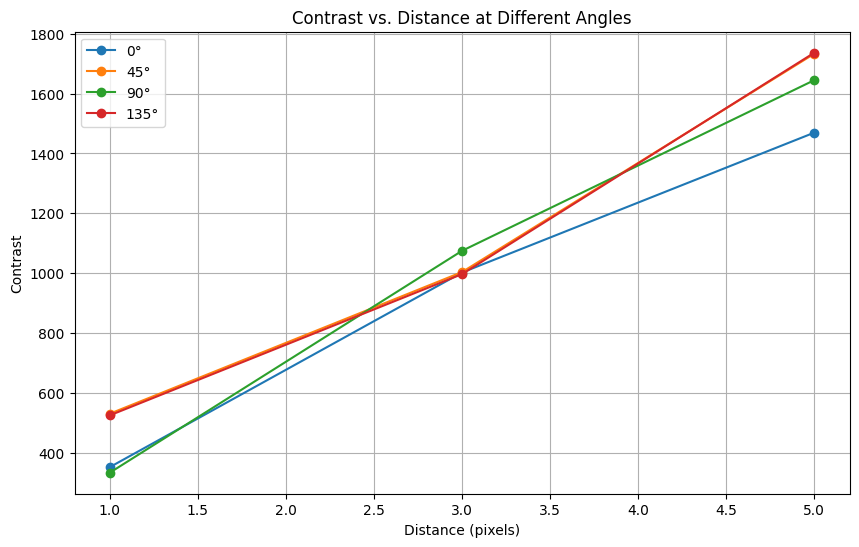

In [10]:
# Task 10: Extract texture features from the coins image
from skimage.feature.texture import graycomatrix, graycoprops
from skimage import img_as_ubyte
import numpy as np
import pandas as pd

# Convert the image to uint8 format as required by graycomatrix
coins_uint8 = img_as_ubyte(coins)

# Calculate GLCM
# Using different distances and angles for a more comprehensive analysis
distances = [1, 3, 5]  # Pixels
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Radians (0, 45, 90, 135 degrees)

# Compute GLCM
glcm = graycomatrix(coins_uint8,
                   distances=distances,
                   angles=angles,
                   levels=256,
                   symmetric=True,
                   normed=True)

# Extract texture properties
features = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
feature_values = {}

for feature in features:
    feature_values[feature] = graycoprops(glcm, feature)

# Create a DataFrame to display the results (average across angles for each distance)
results = []
for i, d in enumerate(distances):
    row = {'Distance': d}
    for feature in features:
        # Calculate average feature value across all angles for this distance
        row[feature] = np.mean(feature_values[feature][i, :])
    results.append(row)

df_texture = pd.DataFrame(results)
print("Texture Features (averaged across angles):")
print(df_texture)

# Calculate overall averages for each feature
print("\nOverall Average Texture Features:")
for feature in features:
    avg_value = np.mean(feature_values[feature])
    print(f"Average {feature}: {avg_value:.6f}")

# Visualize one of the texture features (contrast) at different distances
plt.figure(figsize=(10, 6))
for i, angle_rad in enumerate(angles):
    angle_deg = int(angle_rad * 180 / np.pi)
    plt.plot(distances, feature_values['contrast'][:, i],
             marker='o', label=f'{angle_deg}°')

plt.title('Contrast vs. Distance at Different Angles')
plt.xlabel('Distance (pixels)')
plt.ylabel('Contrast')
plt.legend()
plt.grid(True)
plt.show()

**10. Texture Analysis**


Extracted texture features using Gray Level Co-occurrence Matrix (GLCM), calculating contrast, dissimilarity, homogeneity, energy, and correlation at different distances and angles. Texture analysis provides information about spatial relationships between pixels and is vital for characterizing regions beyond simple intensity values.
These concepts form the foundation of computer vision, progressing from basic image properties through segmentation to advanced feature extraction and analysis.

## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)

***Reflection on Computer Vision Course***

**I was deeply saddened to hear about your loss, Professor.**

**Please accept my heartfelt condolences during this difficult time. May she rest in peace. **

Despite personal challenges, your dedication to teaching this Computer Vision course has been truly inspiring. The journey from basic preprocessing to advanced segmentation provided me with valuable skills that I'll carry forward in my studies and career.

What I appreciate most is how you balanced theoretical concepts with practical implementation. Your thoughtfully designed exercises reinforced key concepts while building our programming proficiency. The step-by-step solutions helped me understand not just what to do, but why we were doing it.

Your clear teaching style and attention to detail made complex topics accessible. Each concept built logically upon previous knowledge, creating a coherent learning experience that challenged and engaged us.

This course has fundamentally changed how I analyze visual information. Thank you for your guidance and for sharing your expertise during what must have been a challenging personal time.